In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')

In [52]:
ipl = pd.read_csv('ipl2022.csv')

In [53]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [54]:
# Columns and no of players in a dataset
ipl.shape

(633, 8)

In [55]:
# we use info for check columns datatypes and nonnull values
ipl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [56]:
# All the columns name 
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [57]:
# to drop unamed column
ipl.drop( 'Unnamed: 0', axis=1, inplace = True)

In [58]:
ipl.head()


,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [59]:
# To see how Many null values in the dataset 
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [60]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [61]:
# Fill nan values with 0
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000) '] = ipl['Cost IN $ (000)']. fillna(0)

In [62]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000)
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans,416.0
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans,338.0
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans,312.0
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans,312.0
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans,65.0
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,NaN,NaN,Unsold,0.0
629,Monu Singh,20 Lakh,BOWLER,0.0,NaN,NaN,Unsold,0.0
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,NaN,NaN,Unsold,0.0
631,Lance Morris,20 Lakh,BOWLER,0.0,NaN,NaN,Unsold,0.0


In [63]:
ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [64]:
ipl.isnull().sum()

Player                0
Base Price            0
TYPE                  0
COST IN ₹ (CR.)       0
Cost IN $ (000)     396
2021 Squad            0
Team                  0
Cost IN $ (000)       0
dtype: int64

In [65]:
teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [66]:
ipl['status'] = ipl['Team'].replace (teams, 'sold')

In [67]:
# ONLY SOLD PLAYERS 
ipl.head()


,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,1950.0,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,1950.0,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,1300.0,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,1170.0,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,1040.0,sold


In [68]:
# PLAYERS WITH SOLD AND UNSOLD STATUS
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,1950.0,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,1950.0,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,1300.0,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,1170.0,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,1040.0,sold
...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,NaN,Not Participated,Unsold,0.0,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,NaN,Not Participated,Unsold,0.0,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,NaN,Not Participated,Unsold,0.0,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,NaN,Not Participated,Unsold,0.0,Unsold


In [69]:
ipl[ipl['Player'].duplicated (keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,84.5,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,NaN,DC,Unsold,0.0,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,NaN,Not Participated,Unsold,0.0,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,NaN,Not Participated,Unsold,0.0,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,NaN,Not Participated,Unsold,0.0,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,NaN,Not Participated,Unsold,0.0,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,NaN,Not Participated,Unsold,0.0,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,NaN,Not Participated,Unsold,0.0,Unsold


In [70]:
# How many players have participated in 2022 IPL Auction?
ipl.shape [0]

633

In [71]:
# How many types of players have participated?
types = ipl['TYPE'].value_counts ()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

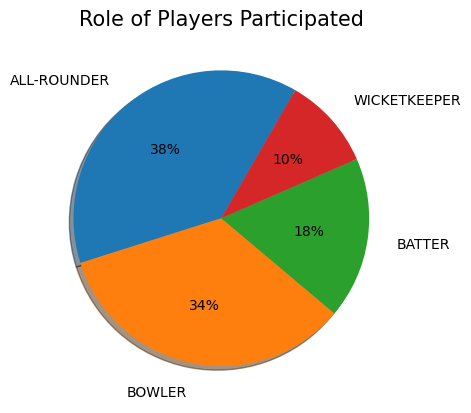

In [72]:
plt.pie(types.values, labels=types.index, labeldistance=1.2,autopct='%1.f%%', shadow=True, startangle=60)
plt.title('Role of Players Participated', fontsize = 15)
plt.plot ()

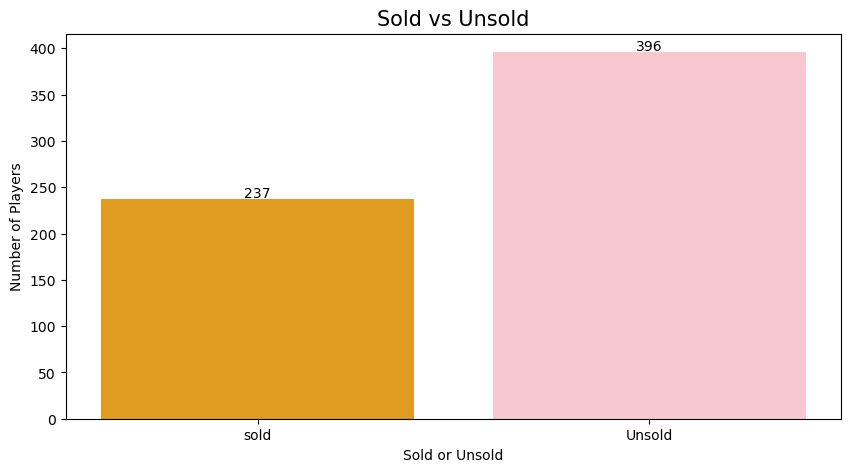

In [81]:
# Players sold and unsold using a bar graph.

plt.figure(figsize= (10,5))
fig = sns.countplot(data=ipl,x="status",palette=['Orange','Pink'])
plt.xlabel('Sold or Unsold')
plt.ylabel ('Number of Players')
plt.title('Sold vs Unsold', fontsize=15)
plt.plot()

for p in fig.patches:
    fig.annotate(format (p.get_height(), '.0f'), (p.get_x() + 
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0, 4), textcoords = 'offset points') 

In [82]:
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

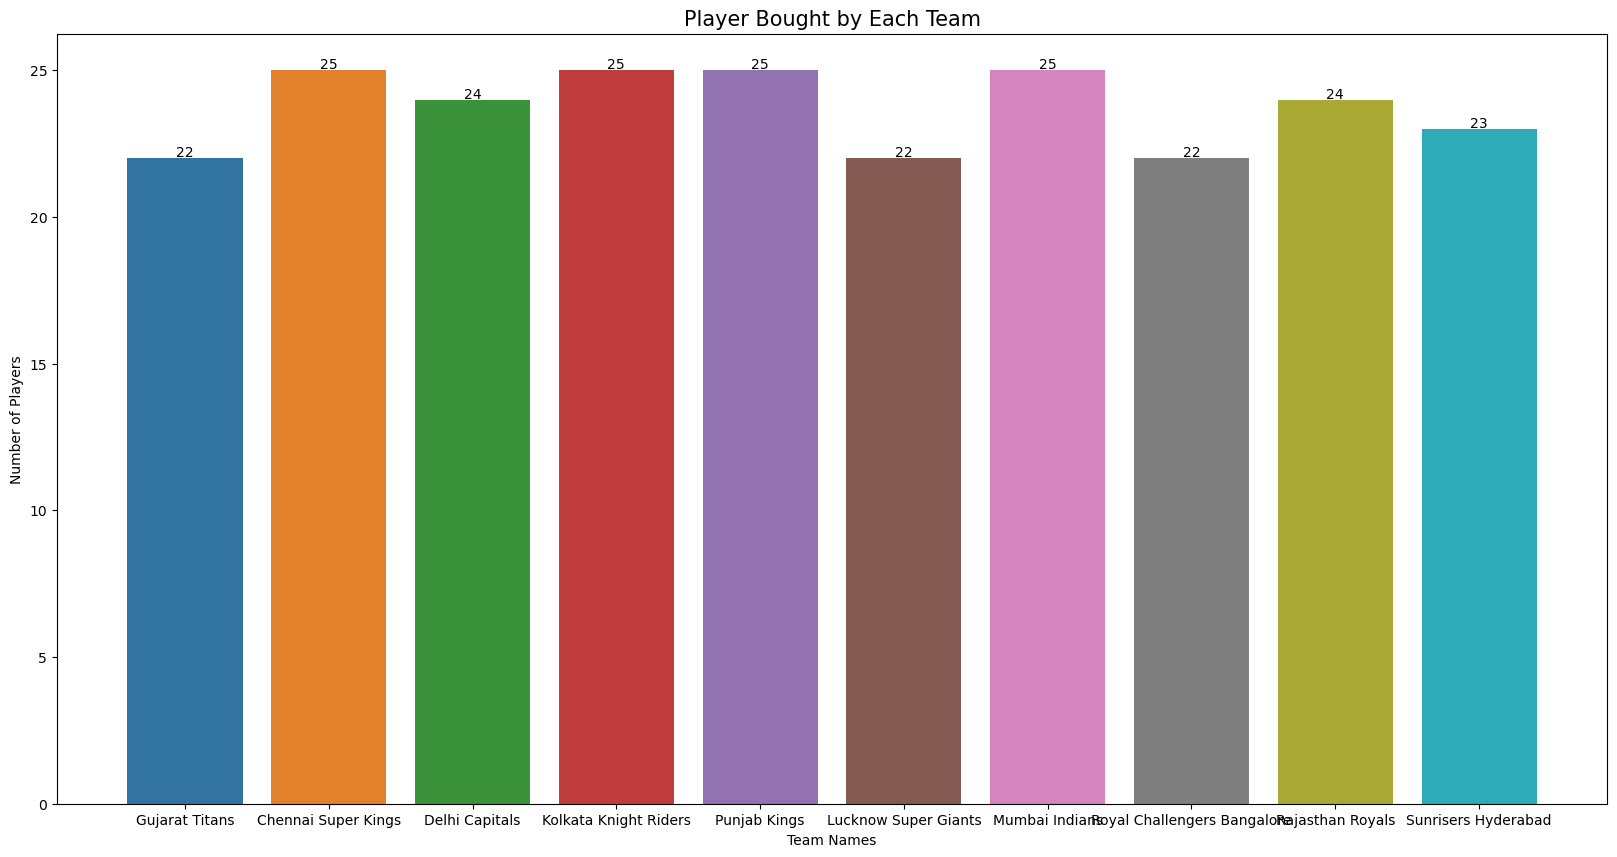

In [98]:
# Players sold and unsold using a bar graph.

plt.figure(figsize= (20,10))
fig = sns.countplot(data=ipl[-(ipl.Team == 'Unsold')],x="Team")
plt.xlabel('Team Names')
plt.ylabel ('Number of Players')
plt.title('Player Bought by Each Team', fontsize=15)
plt.plot()

for p in fig.patches:
    fig.annotate(format (p.get_height(), '.0f'), (p.get_x() + 
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0, 4), textcoords = 'offset points') 

In [106]:
ipl['retention'] = ipl['Base Price']

In [107]:
ipl['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
                          
'50 Lakh', '30 Lakh', '1.5 Cr'], 'From Auction', inplace = True)

In [108]:
# Treating Base Price
ipl ['Base Price'].replace('Draft Pick',0, inplace = True)

In [113]:
ipl['base_price_unit'] = ipl['Base Price'].apply (lambda x: str (x) .split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str (x).split(' ')[0])

In [114]:
ipl['base_price'].replace('Retained',0,inplace=True)

In [115]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status,detention,retention,base_price_unit,base-price,baseprice,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,1950.0,sold,Draft Pick,Draft Pick,0,0,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,1950.0,sold,Draft Pick,Draft Pick,0,0,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,1300.0,sold,2 Cr,From Auction,Cr,2,2,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,1170.0,sold,40 Lakh,From Auction,Lakh,40,40,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,1040.0,sold,Draft Pick,Draft Pick,0,0,0,0


In [116]:
# Total players retained and bought
ipl.groupby (['Team', 'retention']) ['retention'].count ()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

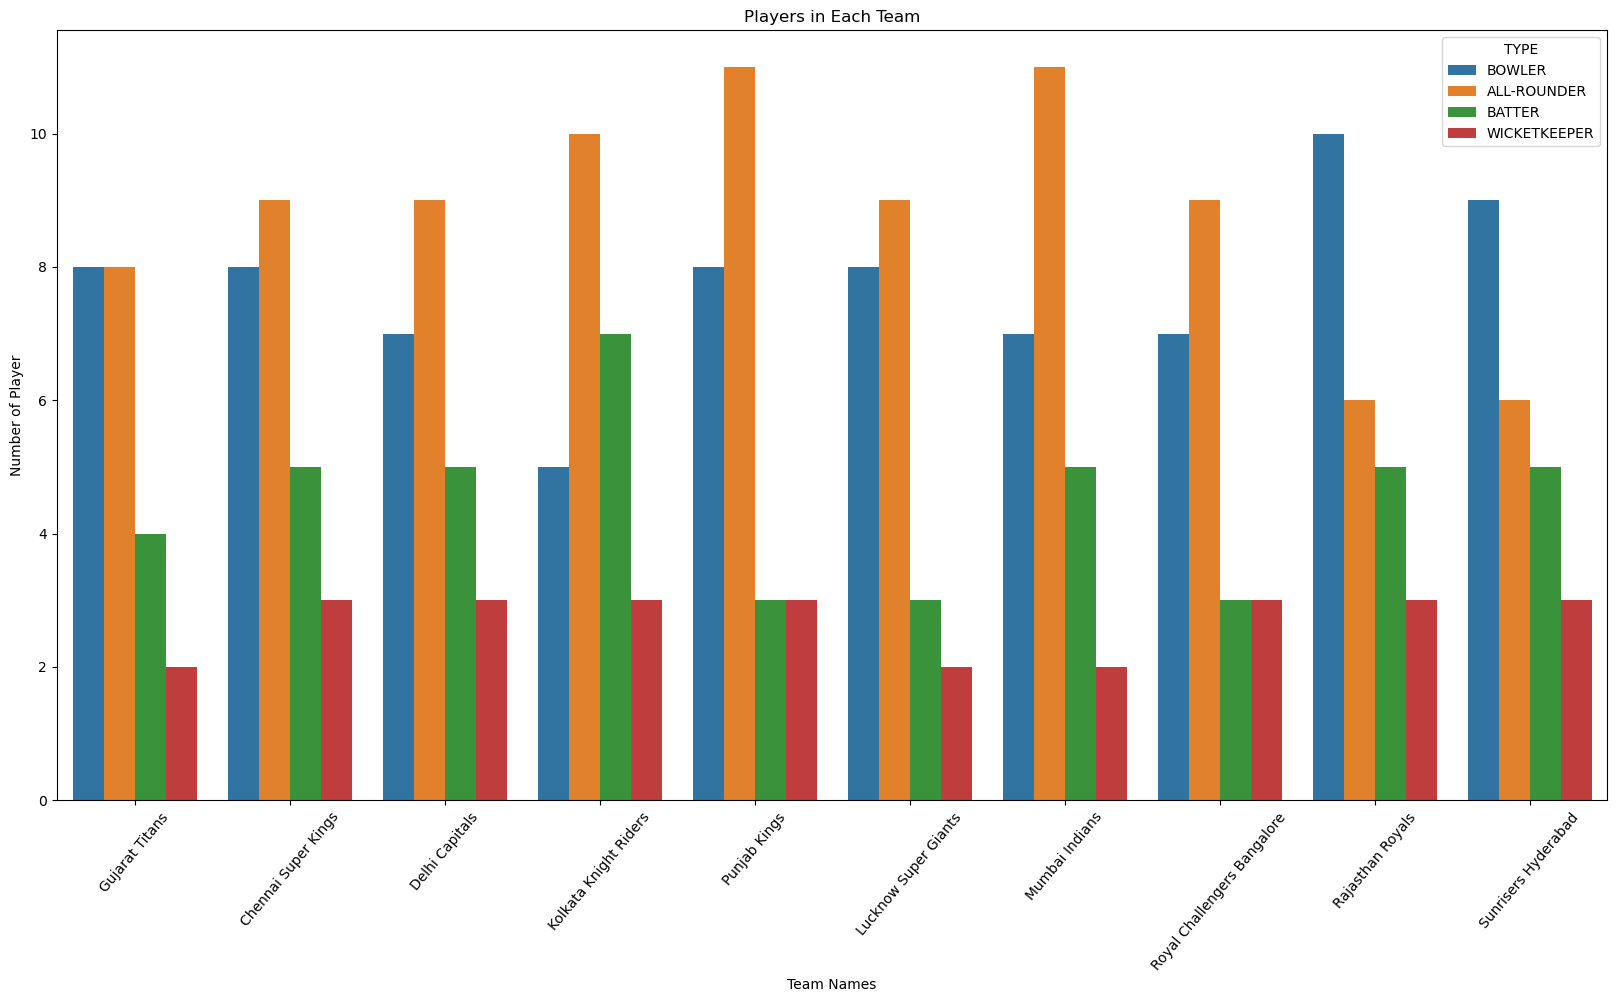

In [122]:
plt.figure(figsize= (20,10))
fig = sns.countplot(data=ipl[-(ipl.Team == 'Unsold')],x="Team",hue=ipl['TYPE'])
plt.title('Players in Each Team')
plt.xlabel('Team Names') 
plt.ylabel('Number of Player')
plt.xticks (rotation=50)

In [127]:
# Highest amount spent on a single player by each team
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending = False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [128]:
# Player retained at maximum price.

ipl[ipl['retention']=='Retained'].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status,detention,retention,base_price_unit,base-price,baseprice,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,2080.0,sold,Retained,Retained,Retained,Retained,Retained,0


In [129]:
# Top 5 Bowlers
ipl[(ipl['retention']== 'From Auction') & (ipl['TYPE']=='BOWLER')].sort_values(by='COST IN ₹ (CR.)', ascending =False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status,detention,retention,base_price_unit,base-price,baseprice,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,1820.0,sold,2 Cr,From Auction,Cr,2,2,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,1397.5,sold,2 Cr,From Auction,Cr,2,2,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,1300.0,sold,1 Cr,From Auction,Cr,1,1,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,1300.0,sold,2 Cr,From Auction,Cr,2,2,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,1300.0,sold,20 Lakh,From Auction,Lakh,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Midhun Sudhesan,20 Lakh,BOWLER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,20 Lakh,From Auction,Lakh,20,20,20
325,Jalaj Saxena,30 Lakh,BOWLER,0.00,NaN,PBKS,Unsold,0.0,Unsold,30 Lakh,From Auction,Lakh,30,30,30
324,Pardeep Sahu,20 Lakh,BOWLER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,20 Lakh,From Auction,Lakh,20,20,20
323,Prince Balwant Rai,20 Lakh,BOWLER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,20 Lakh,From Auction,Lakh,20,20,20


In [130]:
# Top 5 Batsman
ipl[(ipl['retention']== 'From Auction') & (ipl['TYPE']=='BATTER')].sort_values(by='COST IN ₹ (CR.)', ascending =False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status,detention,retention,base_price_unit,base-price,baseprice,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,1592.5,sold,2 Cr,From Auction,Cr,2,2,2
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,1105.0,sold,1.5 Cr,From Auction,Cr,1.5,1.5,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,1105.0,sold,40 Lakh,From Auction,Lakh,40,40,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,1072.5,sold,2 Cr,From Auction,Cr,2,2,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,1007.5,sold,2 Cr,From Auction,Cr,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,Usman Khawaja,1.5 Cr,BATTER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,1.5 Cr,From Auction,Cr,1.5,1.5,1.5
329,Brandon King,50 Lakh,BATTER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,50 Lakh,From Auction,Lakh,50,50,50
330,Janneman Malan,50 Lakh,BATTER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,50 Lakh,From Auction,Lakh,50,50,50
331,Rilee Rossouw,1 Cr,BATTER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,1 Cr,From Auction,Cr,1,1,1


In [131]:
# Top ALL-ROUNDER
ipl[(ipl['retention']== 'From Auction') & (ipl['TYPE']=='ALL-ROUNDER')].sort_values(by='COST IN ₹ (CR.)', ascending =False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Cost IN $ (000),status,detention,retention,base_price_unit,base-price,baseprice,base_price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,1495.0,sold,1 Cr,From Auction,Cr,1,1,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,1397.5,sold,1 Cr,From Auction,Cr,1,1,1
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,1397.5,sold,2 Cr,From Auction,Cr,2,2,2
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,1170.0,sold,40 Lakh,From Auction,Lakh,40,40,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,1170.0,sold,40 Lakh,From Auction,Lakh,40,40,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Ninad Rathva,20 Lakh,ALL-ROUNDER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,20 Lakh,From Auction,Lakh,20,20,20
493,Shoun Roger,20 Lakh,ALL-ROUNDER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,20 Lakh,From Auction,Lakh,20,20,20
504,Mark Adnair,50 Lakh,ALL-ROUNDER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,50 Lakh,From Auction,Lakh,50,50,50
505,Hilton Cartwright,50 Lakh,ALL-ROUNDER,0.00,NaN,Not Participated,Unsold,0.0,Unsold,50 Lakh,From Auction,Lakh,50,50,50


In [132]:
ipl= ipl.rename(columns={'2021 Squad': 'Prev_team'})

In [138]:
unsold_players = ipl[(ipl.Prev_team != 'Not Participated')
            & (ipl.Team == 'Unsold')][[ 'Player','Prev_team']]

In [140]:
print(unsold_players)

                      Player Prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr